<a href="https://colab.research.google.com/github/AXBOUF/python_visulization/blob/main/iot_telemetry_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
IoT dataset
Average values (or trend of changes) for each sensor - based on device ID.
Compare average values of readings for each device
Any correlation between Temp and Humidity? (You can plot Temp vs humidity for every device)
If we have used these devices to monitor a suburb, can we determine Temp and humidity levels of that suburb?
'''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('iot_telemetry_data_updated.csv')
df.head(10)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.590000e+09,b8:27:eb:bf:9d:51,0.004956,51.0,False,0.007651,False,0.020411,22.7
1,1.590000e+09,00:0f:00:70:91:0a,0.002840,76.0,False,0.005114,False,0.013275,19.7
2,1.590000e+09,b8:27:eb:bf:9d:51,0.004976,50.9,False,0.007673,False,0.020475,22.6
3,1.590000e+09,1c:bf:ce:15:ec:4d,0.004403,76.8,True,0.007023,False,0.018628,27.0
4,1.590000e+09,b8:27:eb:bf:9d:51,0.004967,50.9,False,0.007664,False,0.020448,22.6
5,1.590000e+09,1c:bf:ce:15:ec:4d,0.004391,77.9,True,0.007009,False,0.018589,27.0
6,1.590000e+09,b8:27:eb:bf:9d:51,0.004976,50.9,False,0.007673,False,0.020475,22.6
7,1.590000e+09,00:0f:00:70:91:0a,0.002938,76.0,False,0.005241,False,0.013628,19.7
8,1.590000e+09,1c:bf:ce:15:ec:4d,0.004345,77.9,True,0.006957,False,0.018440,27.0
9,1.590000e+09,b8:27:eb:bf:9d:51,0.004970,50.9,False,0.007667,False,0.020457,22.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [ ]:
df.describe()


,ts,co,humidity,lpg,smoke,temp
count,4.051840e+05,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000
mean,1.592943e+09,0.004639,60.511694,0.007237,0.019264,22.453987
std,4.557306e+06,0.001250,11.366489,0.001444,0.004086,2.698347
min,1.590000e+09,0.001171,1.100000,0.002693,0.006692,0.000000
25%,1.590000e+09,0.003919,51.000000,0.006456,0.017024,19.900000
50%,1.590000e+09,0.004812,54.900000,0.007489,0.019950,22.200000
75%,1.600000e+09,0.005409,74.300000,0.008150,0.021838,23.600000
max,1.600000e+09,0.014420,99.900000,0.016567,0.046590,30.600000


In [ ]:

device_avg = df.groupby('device').mean()
print(device_avg)


                             ts        co   humidity     light       lpg  \
device                                                                     
00:0f:00:70:91:0a  1.592980e+09  0.003527  75.444361  0.032268  0.005893   
1c:bf:ce:15:ec:4d  1.592905e+09  0.004183  61.910247  1.000000  0.006764   
b8:27:eb:bf:9d:51  1.592943e+09  0.005560  50.814077  0.016010  0.008306   

                     motion     smoke       temp  
device                                            
00:0f:00:70:91:0a  0.000027  0.015489  19.362552  
1c:bf:ce:15:ec:4d  0.003163  0.017895  26.025511  
b8:27:eb:bf:9d:51  0.000768  0.022288  22.279969  


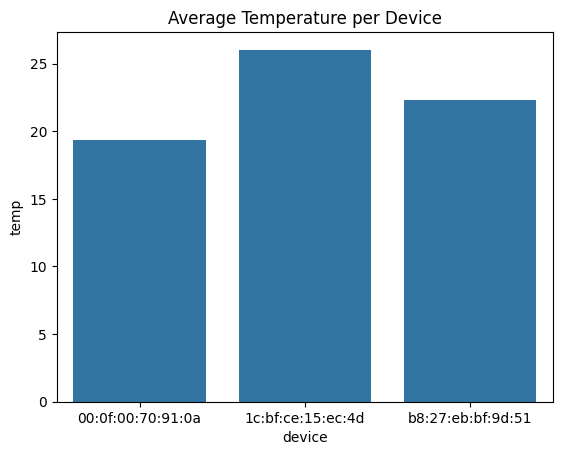

In [ ]:



sns.barplot(x=device_avg.index, y=device_avg['temp'])
plt.title("Average Temperature per Device")
plt.show()



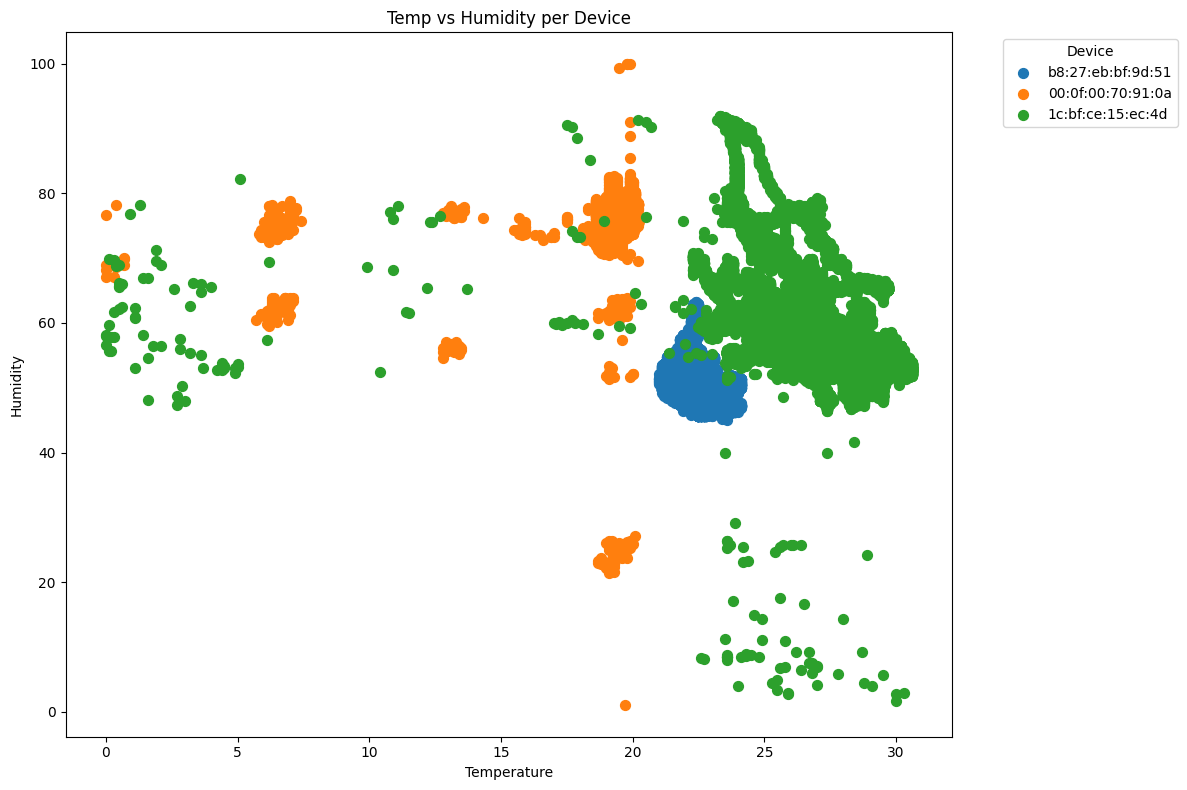

In [ ]:
plt.figure(figsize=(12, 8))

for dev in df['device'].unique():
    subset = df[df['device'] == dev]
    plt.scatter(subset['temp'], subset['humidity'], label=dev, s=50)

plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.legend(title="Device", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Temp vs Humidity per Device")
plt.tight_layout()
plt.show()

In [ ]:

suburb_avg = df.groupby('ts')[['temp','humidity']].mean()


suburb_avg.index = pd.to_datetime(suburb_avg.index, unit='s')


print(suburb_avg.head())


                          temp   humidity
ts                                       
2020-05-20 18:40:00  22.325804  60.417937
2020-09-13 12:26:40  22.761348  60.736506


In [ ]:
overall_temp = suburb_avg['temp'].mean()
overall_humidity = suburb_avg['humidity'].mean()

print(f"estimated suburb avg temperature: {overall_temp:.2f} °C")
print(f"estimated suburb aveg humidity: {overall_humidity:.2f} %")


Estimated suburb average temperature: 22.54 °C
Estimated suburb average humidity: 60.58 %
